# End-to-End Customer Churn Prediction

**Project Goal:** The objective of this project is to build a machine learning model that can accurately predict customer churn for a telecommunications company. By identifying customers who are likely to leave, the business can proactively target them with retention strategies.

**Methodology:** This notebook covers the complete data science workflow, including data cleaning, exploratory data analysis (EDA), feature engineering, and model building. Several models are tested, with a final focus on a SMOTE-balanced Random Forest classifier to handle the imbalanced nature of the churn data.

**Key Result:** The final model significantly improved the identification of at-risk customers, demonstrating a strong potential for reducing churn through targeted interventions.


## Project Setup and Data Loading


In [ ]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for all our plots
sns.set_style('darkgrid')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco Customer Churn.csv to Telco Customer Churn.csv


In [ ]:
df = pd.read_csv("Telco Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Display a concise summary of the DataFrame to check for data types and missing values
print("\nDataFrame Info:")
df.info()



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

In [ ]:
df.shape

(7043, 21)

## Data Cleaning

The initial inspection revealed that the `TotalCharges` column is of the `object` type and contains 11 missing values. In this step, we will:
1.  Convert `TotalCharges` to a numeric format, coercing errors into `NaN` (Not a Number).
2.  Drop the rows containing these missing values, as they represent a very small fraction of the dataset.
3.  Verify that there are no duplicate rows.


In [ ]:
#Correct Data Types
# The 'TotalCharges' column is an 'object' type. Let's convert it to a numeric type.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
#Check for Duplicate Rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
#Check for Missing Values
print("\nMissing values in each column after data type conversion:")
print(df.isnull().sum())


Missing values in each column after data type conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Handle Missing Values

print(f"Number of rows before dropping missing values: {len(df)}")

# Drop rows with any missing values (which is just the 11 in TotalCharges)
df.dropna(inplace=True)

# Verify that the missing values have been removed
print("\nMissing values after handling:")
print(df.isnull().sum())

# Confirm the new number of rows
print(f"\nNumber of rows after dropping missing values: {len(df)}")


Number of rows before dropping missing values: 7043

Missing values after handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Number of rows after dropping missing values: 7032


## Exploratory Data Analysis (EDA)

Now that the data is clean, we'll create visualizations to understand the relationships between different features and customer churn. This will help us identify potential predictors for our model.


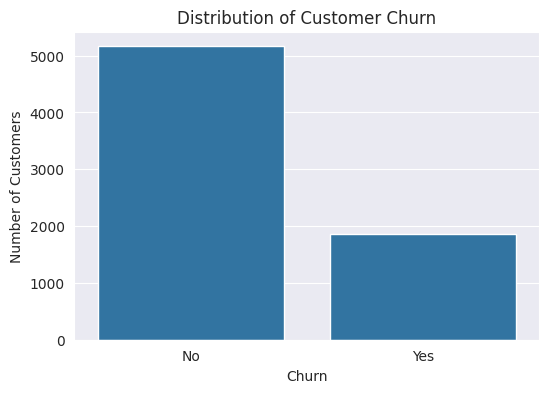

Churn Rate:
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64



In [ ]:
# Analyze the Target Variable: Churn
# First, let's see the overall distribution of churned vs. non-churned customers.
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

# Calculate and print the exact churn percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Rate:\n{churn_rate}\n")


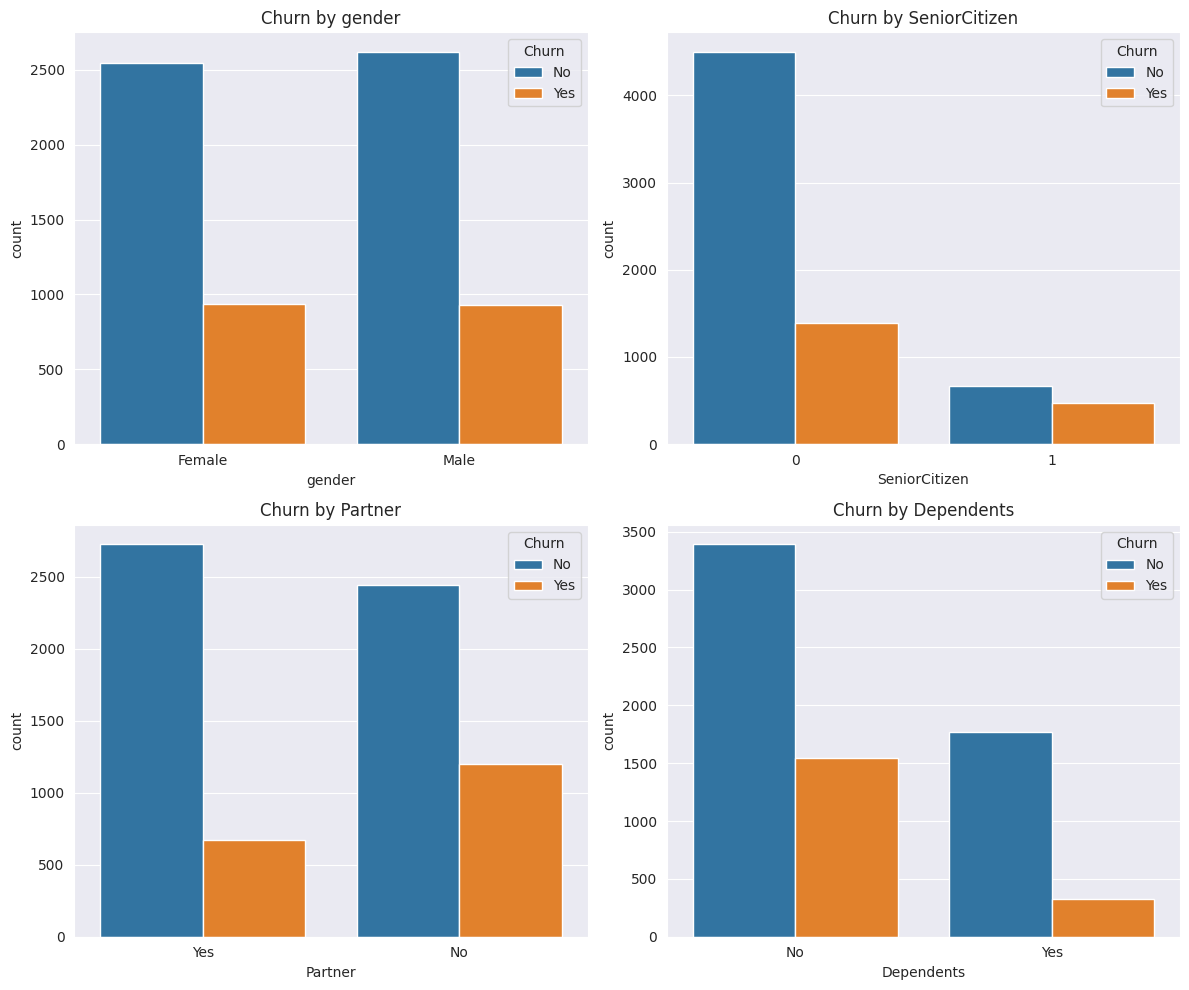

In [ ]:
# Analyze Demographics vs. Churn
# Let's see how churn varies across different demographic groups.
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Create a figure to hold all the subplots
plt.figure(figsize=(12, 10))

# Loop through each demographic feature and create a count plot
for i, feature in enumerate(demographic_features):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid of plots
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn by {feature}')

plt.tight_layout() # Adjust layout to prevent plots from overlapping
plt.show()



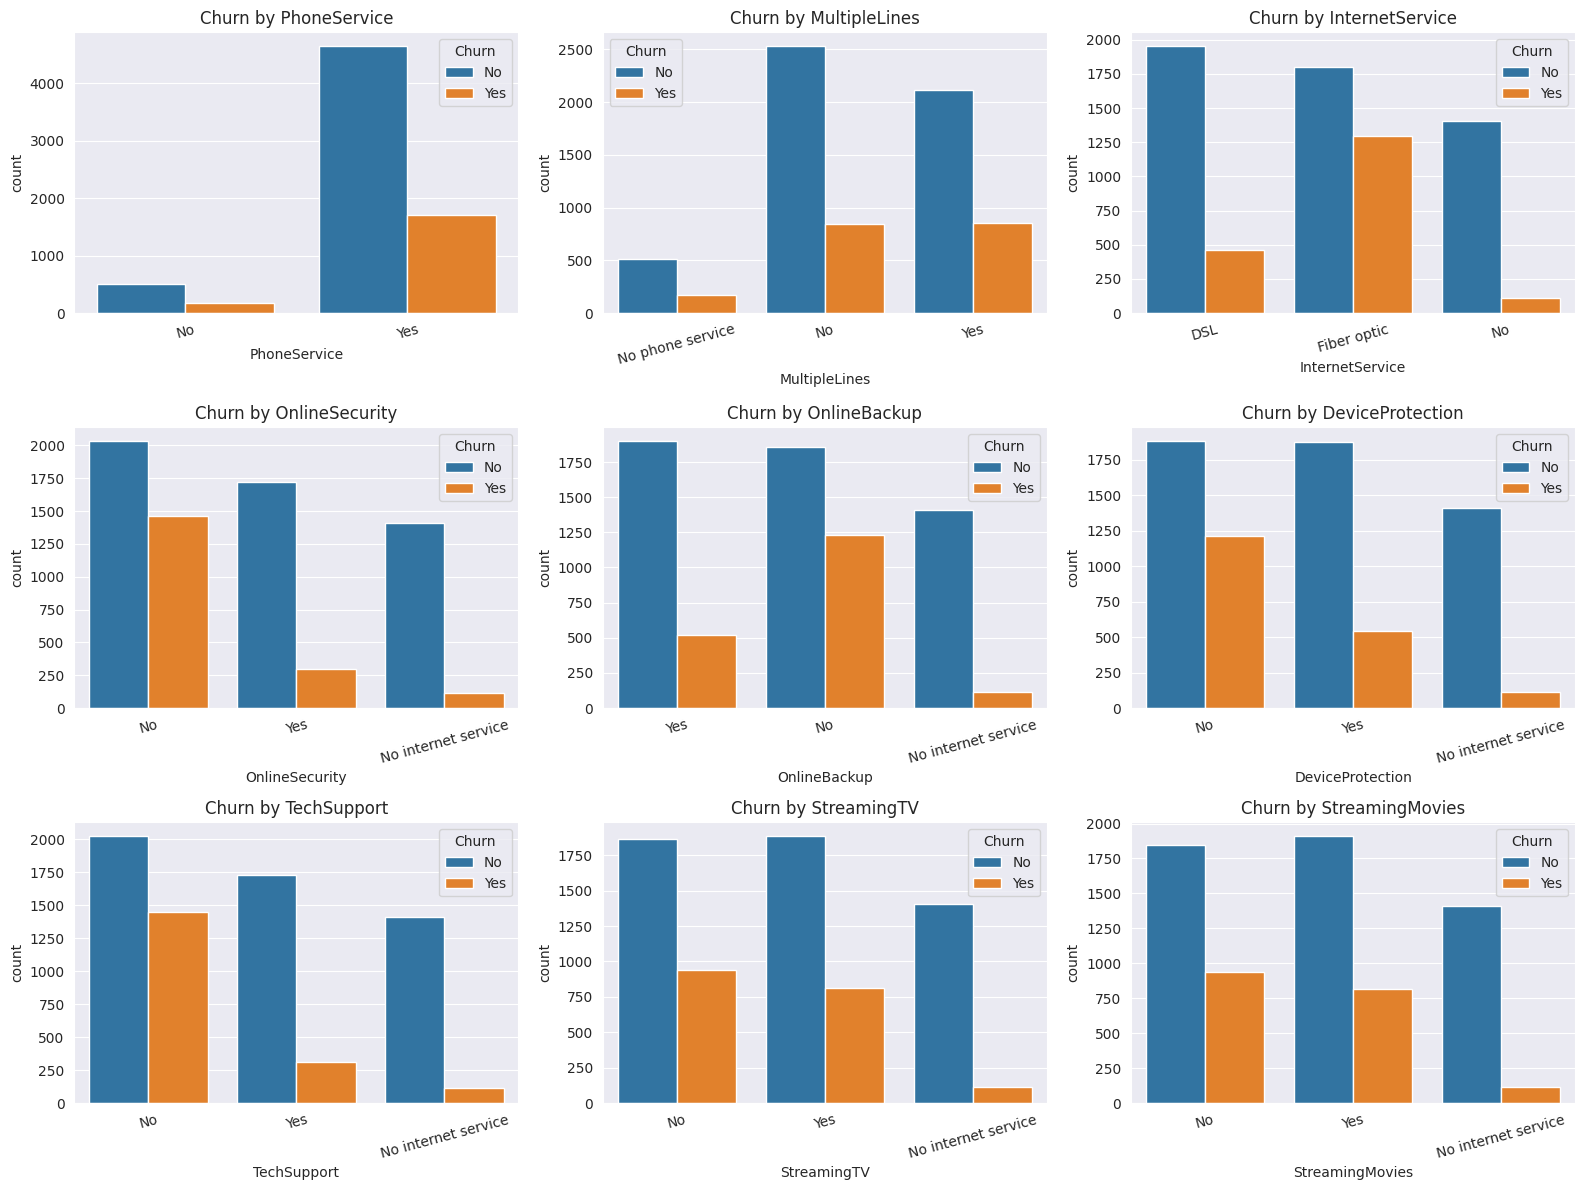

In [ ]:
# Analyze Services vs. Churn
# List of service-related columns to analyze
service_features = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create a figure to hold all the subplots
plt.figure(figsize=(16, 12))

# Loop through each service feature and create a count plot
for i, feature in enumerate(service_features):
    plt.subplot(3, 3, i + 1) # Create a 3x3 grid of plots
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn by {feature}')
    plt.xticks(rotation=15) # Rotate x-axis labels slightly for readability

plt.tight_layout() # Adjust layout to prevent plots from overlapping
plt.show()


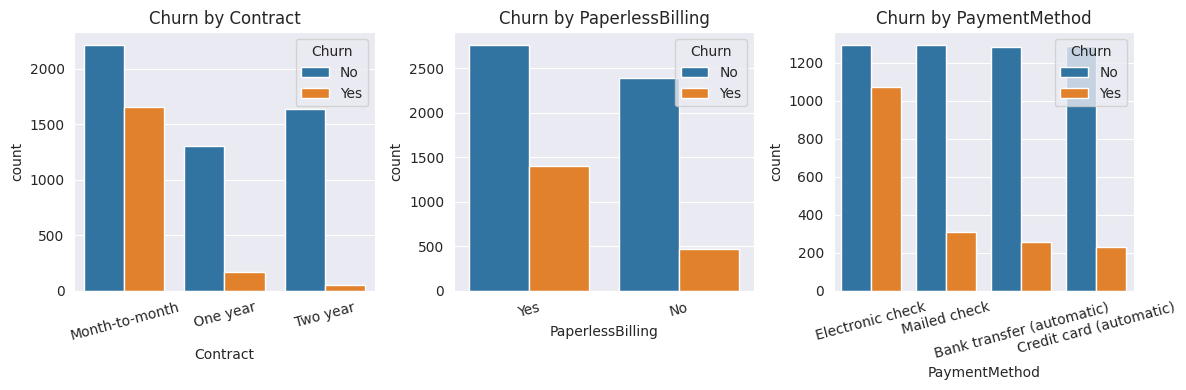

In [ ]:
# Analyze Account Information vs. Churn
account_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Create a figure for the categorical account features
plt.figure(figsize=(12, 4))

# Loop through each account feature and create a count plot
for i, feature in enumerate(account_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'Churn by {feature}')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

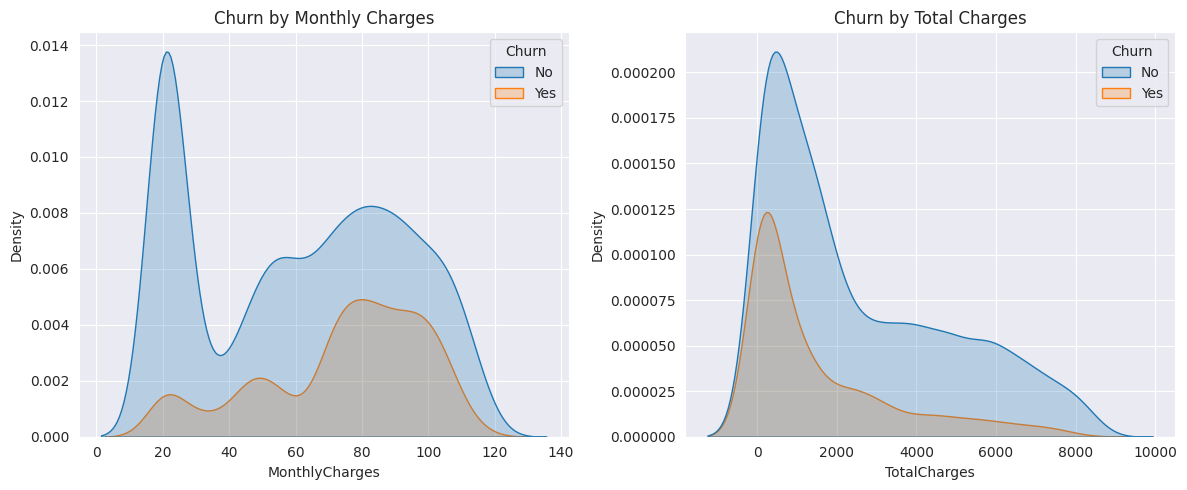

In [ ]:
# Analyze Numerical Features vs. Churn
# Let's look at the distribution of monthly and total charges for customers who churn vs. those who don't.
plt.figure(figsize=(12, 5))

# Plot for MonthlyCharges
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)
plt.title('Churn by Monthly Charges')

# Plot for TotalCharges
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True)
plt.title('Churn by Total Charges')

plt.tight_layout()
plt.show()


## Feature Engineering and Preprocessing

To prepare the data for our machine learning models, we need to perform several steps:
1.  **Encode Categorical Variables:** We'll convert binary features (e.g., 'Yes'/'No') into `1`s and `0`s. For features with more than two categories, we'll use one-hot encoding.
2.  **Scale Numerical Features:** We will use `StandardScaler` to scale numerical columns. This ensures that features with larger ranges don't disproportionately influence the model.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a copy to avoid changing the original DataFrame
df_processed = df.copy()

# Drop the customerID column as it's not a predictive feature
df_processed.drop('customerID', axis=1, inplace=True)

# Convert binary text columns to 0s and 1s
df_processed['SeniorCitizen'] = df_processed['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})

binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df_processed[col] = df_processed[col].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


# Use One-Hot Encoding for multi-category columns (UPDATED)
# We add dtype=int to get 1s and 0s instead of True/False
df_processed = pd.get_dummies(df_processed, drop_first=True, dtype=int)


# Scale the numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])


# Display the first few rows of the fully processed DataFrame
print("Data has been successfully preprocessed. Here are the first 5 rows with 1s and 0s:")
print(df_processed.head())


Data has been successfully preprocessed. Here are the first 5 rows with 1s and 0s:
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.280248             0   
1       1              0        0           0  0.064303             1   
2       1              0        0           0 -1.239504             1   
3       1              0        0           0  0.512486             0   
4       0              0        0           0 -1.239504             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -1.161694     -0.994194      0  ...   
1                 0       -0.260878     -0.173740      0  ...   
2                 1       -0.363923     -0.959649      1  ...   
3                 0       -0.747850     -0.195248      0  ...   
4                 1        0.196178     -0.940457      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0              

/tmp/ipython-input-3958258295.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed[col] = df_processed[col].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


## Model Building & Evaluation

We'll now train and evaluate our models. We start with a baseline Decision Tree and then a more complex Random Forest.

### Model 1: Decision Tree Classifier


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. Separate Features (X) and Target (y)
X = df_processed.drop('Churn', axis=1) # All columns except 'Churn'
y = df_processed['Churn']              # Only the 'Churn' column

# 2. Split Data into Training and Testing Sets
# We'll use 80% of the data for training and 20% for testing.
# random_state ensures we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# 3. Initialize and Train the Decision Tree Model
# We create an instance of the model.
model = DecisionTreeClassifier(random_state=42)

# We train the model using the .fit() method on our training data.
model.fit(X_train, y_train)

print("\nDecision Tree model has been successfully trained!")



Training data shape: (5625, 30)
Testing data shape: (1407, 30)

Decision Tree model has been successfully trained!


Model Accuracy: 0.7249

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.72      0.73      1407


Confusion Matrix:
[[829 204]
 [183 191]]


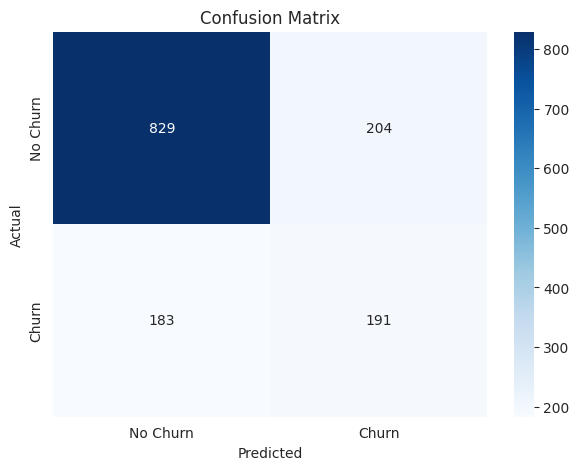

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Make Predictions on the Test Data
y_pred = model.predict(X_test)

# 2. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# 3. Display the Classification Report
# This gives us precision, recall, and f1-score.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Display the Confusion Matrix
# This shows us exactly where the model made mistakes.
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# For a better visual, let's plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Model 2: Random Forest Classifier


Random Forest model has been successfully trained!

Random Forest Model Accuracy: 0.7875

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407


Confusion Matrix:
[[935  98]
 [201 173]]


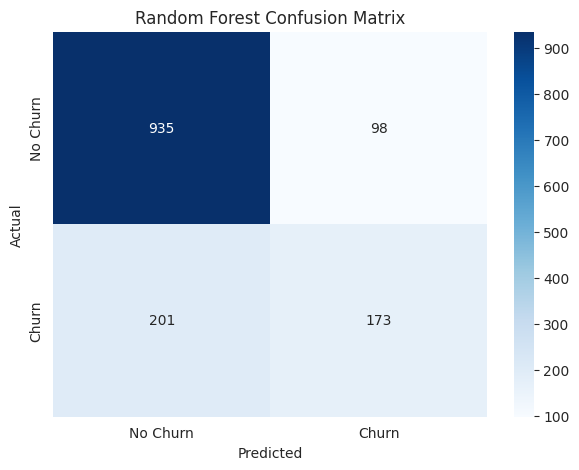

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize and Train the Random Forest Model
# We'll use 100 trees in our forest.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the same training data
rf_model.fit(X_train, y_train)

print("Random Forest model has been successfully trained!")

# 2. Make Predictions and Evaluate the New Model
y_pred_rf = rf_model.predict(X_test)

#  Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Model Accuracy: {accuracy_rf:.4f}")

#  Display the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Display the Confusion Matrix
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


## Handling Class Imbalance with SMOTE

Our Random Forest model showed good accuracy but poor recall for the 'Churn' class. This is due to the imbalanced dataset. To address this, we'll use the **Synthetic Minority Over-sampling Technique (SMOTE)**.

SMOTE creates new, synthetic data points for the minority class ('Churn'). This results in a balanced training set, helping the model learn the patterns of both classes more effectively.

Class distribution before SMOTE:
Churn
0    4130
1    1495
Name: count, dtype: int64

Class distribution after SMOTE:
Churn
1    4130
0    4130
Name: count, dtype: int64

Random Forest model re-trained on balanced data!

--- Evaluation on Test Data (after SMOTE) ---

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1033
           1       0.55      0.61      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.76      0.77      1407


Confusion Matrix:


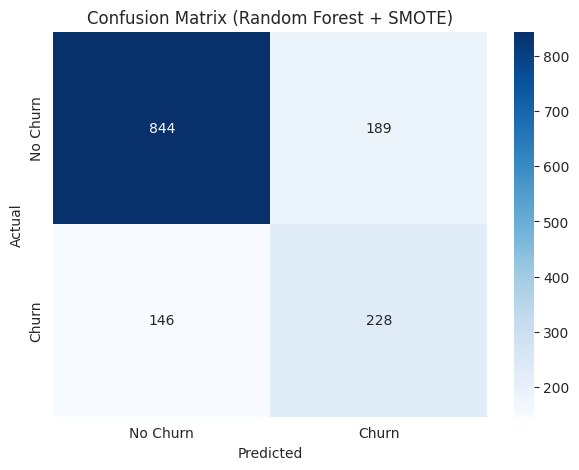

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Apply SMOTE to the Training Data
print("Class distribution before SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())


# 2. Re-train the Random Forest model on the balanced data
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

print("\nRandom Forest model re-trained on balanced data!")


# 3. Evaluate the new model on the original, untouched test data
y_pred_smote = rf_model_smote.predict(X_test)

print("\n--- Evaluation on Test Data (after SMOTE) ---")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))

print("\nConfusion Matrix:")
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest + SMOTE)')
plt.show()


## Final Model Comparison and Conclusion

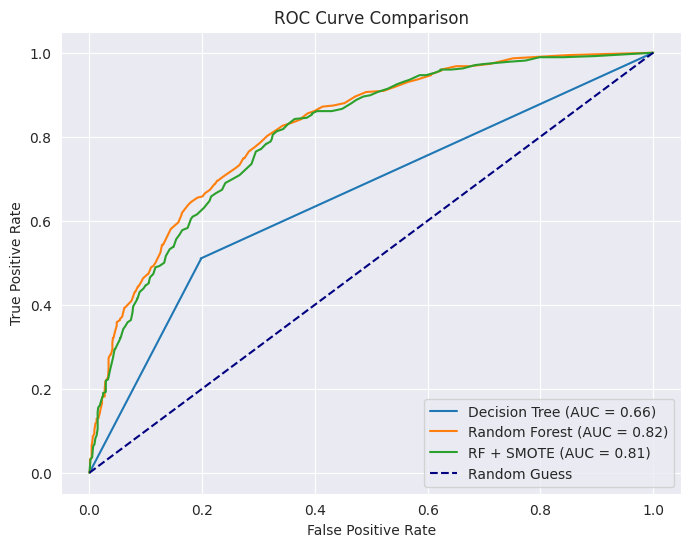

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities for the positive class (Churn)
# Decision Tree
probs_dt = model.predict_proba(X_test)[:, 1]
# Random Forest
probs_rf = rf_model.predict_proba(X_test)[:, 1]
# Random Forest + SMOTE
probs_rf_smote = rf_model_smote.predict_proba(X_test)[:, 1]

# Calculate ROC curve data points
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, probs_rf_smote)

# Calculate AUC scores
auc_dt = roc_auc_score(y_test, probs_dt)
auc_rf = roc_auc_score(y_test, probs_rf)
auc_rf_smote = roc_auc_score(y_test, probs_rf_smote)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'RF + SMOTE (AUC = {auc_rf_smote:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
